In [170]:
import sys
import pandas as pandas
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as statmodel
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats import stattools

In [153]:
#Zadanie1. Wczytaj plik piwo.csv
piwo=pandas.read_csv("./piwo.csv")

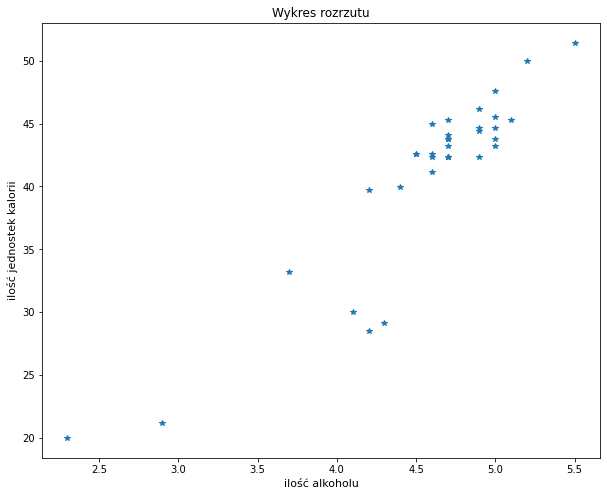

In [154]:
#Zadanie2. Wykonaj wykres rozrzutu
plt.figure(figsize=(10,8))
plt.title('Wykres rozrzutu')
plt.plot("alkohol", "kalorie", data=piwo, linestyle='none', marker='*')
plt.ylabel('ilość jednostek kalorii', horizontalalignment='center')
plt.xlabel('ilość alkoholu', horizontalalignment='center')
plt.show()

In [155]:
R = np.corrcoef(piwo["alkohol"],piwo["kalorie"])[1][0]
print("Współczynnik korelacji: \t",R)
print("Kwadrat współczynnika korelacji:", pow(R, 2))

Współczynnik korelacji: 	 0.9144565338418085
Kwadrat współczynnika korelacji: 0.8362307522859747


In [156]:
#Zadanie3 Budowa modelu 
model = LinearRegression()
model.fit(piwo[["alkohol"]],piwo["kalorie"], sample_weight=None)
print('b1: ', model.coef_[0])
print('b0: ', model.intercept_)

b1:  10.898342297297539
b0:  -8.797497962949983


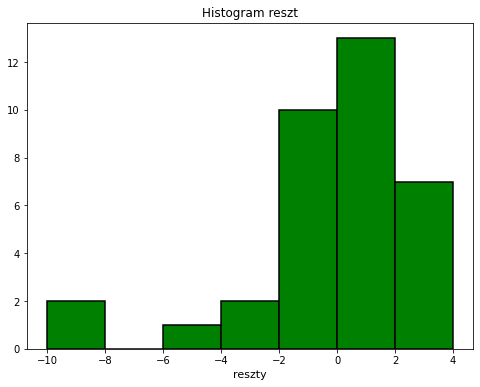

In [157]:
predict = model.predict(piwo[["alkohol"]])
piwo["reszty"] = piwo["kalorie"] - predict
fig = plt.figure(figsize=(8,6))
plt.title('Histogram reszt')
plt.xlabel('reszty')
plt.hist(piwo["reszty"], color = "green", edgecolor='black', bins=[-10, -8, -6,  -4, -2, 0, 2, 4], linewidth=1.5);
plt.show()

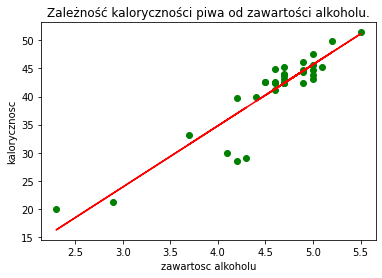

In [158]:
plt.title('Zależność kaloryczności piwa od zawartości alkoholu.')
plt.xlabel('zawartosc alkoholu')
plt.ylabel('kalorycznosc')
plt.scatter(piwo["alkohol"], piwo["kalorie"], color = 'green')
plt.plot(piwo["alkohol"], predict, color = 'red')
plt.show()

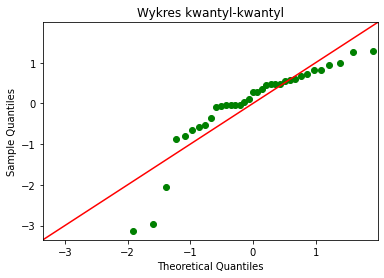

In [171]:
statmodel.qqplot(piwo["reszty"],color = "green", line='45',fit=True)
plt.title('Wykres kwantyl-kwantyl')
plt.show()

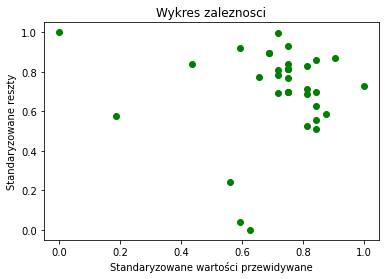

In [184]:
reszty_norm=(piwo["reszty"]-piwo["reszty"].min())/(piwo["reszty"].max()-piwo["reszty"].min())
predict_norm=(predict-predict.min())/(predict.max()-predict.min())
plt.title("Wykres zaleznosci")
plt.xlabel('Standaryzowane wartości przewidywane')
plt.ylabel('Standaryzowane reszty')
plt.scatter(predict_norm, reszty_norm, color = 'green')
plt.show()

In [161]:
#Zadanie5 - Oddzielanie piw light
piwo["light"] = np.where(piwo["alkohol"] <= 4.3, 1, 0)

In [162]:
#Test Shapiro-Wilka
stat= stats.shapiro(piwo["reszty"])
print('Statystyka=%.3f, p-wartosc=%.6f' % (stat[0], stat[1]))
if stat[1] > 0.05:
	print('P-wartosc jest wieksza niz poziom istotnosci')
else:
	print('P-wartosc jest mniejsza niz poziom istotnosci')

#Test Dubrina-Watsona
#niestety nie znalazlem sposobu na uzyskanie p-wartosci testem Dubrina-Watsona
DubrinWatson = stattools.durbin_watson(piwo["reszty"])
print('\nDurbin-Watson stat: %.3f' %(DubrinWatson)) 


Statystyka=0.832, p-wartosc=0.000091
P-wartosc jest mniejsza niz poziom istotnosci

Durbin-Watson stat: 2.697


In [164]:
#Zadanie6 - osobna budowa modelu dla piw light i normalnych
light = piwo[piwo["light"] == 1]
light_model = LinearRegression()
light_model.fit(light[["alkohol"]],light["kalorie"], sample_weight=None)
predict_light = light_model.predict(light[["alkohol"]])
R = np.corrcoef(light["alkohol"],light["kalorie"])[1][0]
print("Piwa light: ")
print("Współczynnik korelacji: \t",R)
print("Kwadrat współczynnika korelacji:", pow(R, 2))
print('b1: ', light_model.coef_[0])
print('b0: ', light_model.intercept_)

Piwa light: 
Współczynnik korelacji: 	 0.7732282193384542
Kwadrat współczynnika korelacji: 0.5978818791813166
b1:  6.750386743017873
b0:  4.023509344418326


In [165]:
normal = piwo[piwo["light"] == 0]
normal_model = LinearRegression()
normal_model.fit(normal[["alkohol"]],normal["kalorie"], sample_weight=None)
predict_normal = normal_model.predict(normal[["alkohol"]])
R = np.corrcoef(normal["alkohol"],normal["kalorie"])[1][0]
print("Piwa normalne: ")
print("Współczynnik korelacji: \t",R)
print("Kwadrat współczynnika korelacji:", pow(R, 2))
print('b1: ', normal_model.coef_[0])
print('b0: ', normal_model.intercept_)

Piwa normalne: 
Współczynnik korelacji: 	 0.8184403409880893
Kwadrat współczynnika korelacji: 0.6698445917566999
b1:  8.292124164920502
b0:  4.3236358012686225


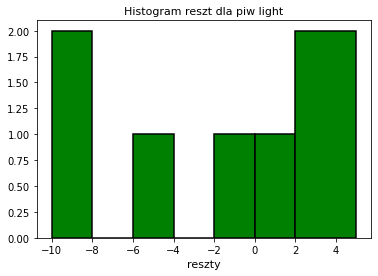

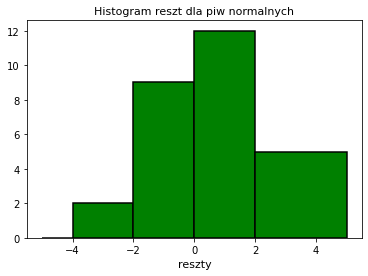

In [166]:
fig = plt.figure(figsize=(6,4))
plt.hist(light["reszty"], color = "green", edgecolor='black', bins=[-10, -8, -6,  -4, -2, 0, 2, 5], linewidth=1.5);
plt.title('Histogram reszt dla piw light')
plt.xlabel('reszty')
plt.show()

fig = plt.figure()
plt.hist(normal["reszty"], color = "green", edgecolor='black', bins=[-5, -4, -2, 0, 2, 5], linewidth=1.5);
plt.title('Histogram reszt dla piw normalnych')
plt.xlabel('reszty')
plt.show()

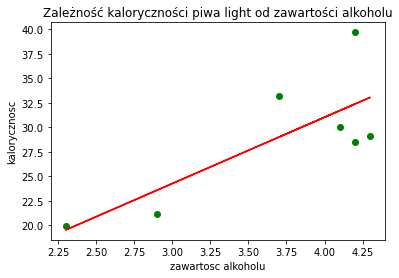

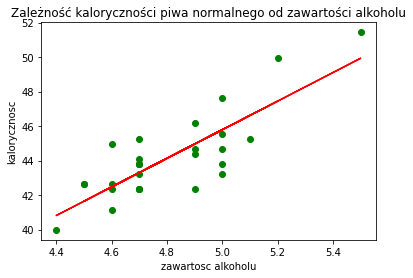

In [167]:
plt.title('Zależność kaloryczności piwa light od zawartości alkoholu')
plt.xlabel('zawartosc alkoholu')
plt.ylabel('kalorycznosc')
plt.scatter(light["alkohol"], light["kalorie"], color = 'green')
plt.plot(light["alkohol"], predict_light, color = 'red')
plt.show()


plt.title('Zależność kaloryczności piwa normalnego od zawartości alkoholu')
plt.xlabel('zawartosc alkoholu')
plt.ylabel('kalorycznosc')
plt.scatter(normal["alkohol"], normal["kalorie"], color = 'green')
plt.plot(normal["alkohol"], predict_normal, color = 'red')
plt.show()

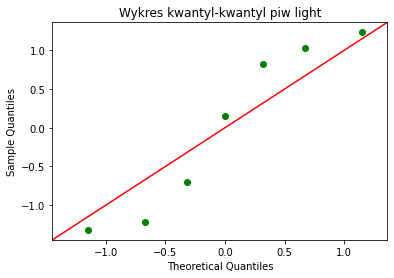

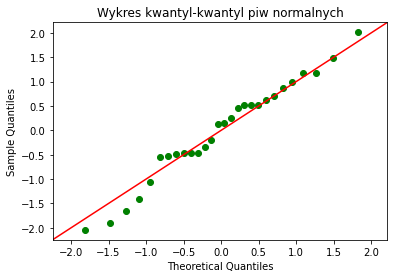

In [176]:
statmodel.qqplot(light["reszty"],color = "green", line='45',fit=True)
plt.title('Wykres kwantyl-kwantyl piw light')
plt.show()

statmodel.qqplot(normal["reszty"],color = "green", line='45',fit=True)
plt.title('Wykres kwantyl-kwantyl piw normalnych')
plt.show()

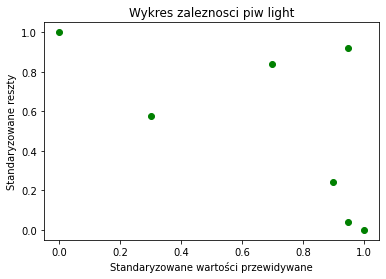

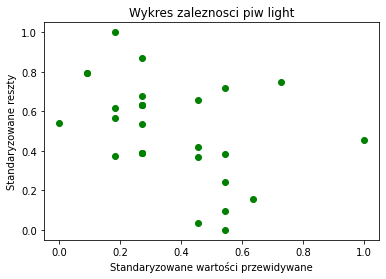

In [183]:
reszty_ligh_norm=(light["reszty"]-light["reszty"].min())/(light["reszty"].max()-light["reszty"].min())
predict_light_norm=(predict_light-predict_light.min())/(predict_light.max()-predict_light.min())
plt.title("Wykres zaleznosci piw light")
plt.xlabel('Standaryzowane wartości przewidywane')
plt.ylabel('Standaryzowane reszty')
plt.scatter(predict_light_norm, reszty_ligh_norm, color = 'green')
plt.show()

reszty_normal_norm=(normal["reszty"]-normal["reszty"].min())/(normal["reszty"].max()-normal["reszty"].min())
predict_normal_norm=(predict_normal-predict_normal.min())/(predict_normal.max()-predict_normal.min())
plt.title("Wykres zaleznosci piw light")
plt.xlabel('Standaryzowane wartości przewidywane')
plt.ylabel('Standaryzowane reszty')
plt.scatter(predict_normal_norm, reszty_normal_norm, color = 'green')
plt.show()

In [189]:
#Test Shapiro-Wilka dla piw light]
print("PIWA LIGHT")
stat_light= stats.shapiro(light["reszty"])
print('Statystyka=%.3f, p-wartosc=%.6f' % (stat_light[0], stat_light[1]))
if stat_light[1] > 0.05:
	print('P-wartosc jest wieksza niz poziom istotnosci')
else:
	print('P-wartosc jest mniejsza niz poziom istotnosci')

#Test Dubrina-Watsona
DubrinWatson = stattools.durbin_watson(light["reszty"])
print('Durbin-Watson stat: %.3f' %(DubrinWatson)) 

print("\nPIWA NORMALNE")
stat_normal= stats.shapiro(normal["reszty"])
print('Statystyka=%.3f, p-wartosc=%.6f' % (stat_normal[0], stat_normal[1]))
if stat_normal[1] > 0.05:
	print('P-wartosc jest wieksza niz poziom istotnosci')
else:
	print('P-wartosc jest mniejsza niz poziom istotnosci')

#Test Dubrina-Watsona
DubrinWatson = stattools.durbin_watson(normal["reszty"])
print('Durbin-Watson stat: %.3f' %(DubrinWatson)) 


PIWA LIGHT
Statystyka=0.883, p-wartosc=0.241440
P-wartosc jest wieksza niz poziom istotnosci
Durbin-Watson stat: 2.336

PIWA NORMALNE
Statystyka=0.973, p-wartosc=0.659667
P-wartosc jest wieksza niz poziom istotnosci
Durbin-Watson stat: 2.010


In [197]:
#Zadanie 7 - zastosowanie modelu na "wlasnych" piwach
nowe_piwa = np.array([2.0,3.5,4.0,5.5,6.0])
nowe_piwa = pd.DataFrame(data=nowe_piwa, columns=["alkohol"])
nowe_piwa["predict"] = model.predict(nowe_piwa)
nowe_piwa

,alkohol,predict
0,2.0,12.999187
1,3.5,29.346700
2,4.0,34.795871
3,5.5,51.143385
4,6.0,56.592556
